<a href="https://colab.research.google.com/github/MonVillal/Estad-stica-Verano/blob/main/A%C3%B1os_de_experiencia_Unidad_1_Estad%C3%ADstica_Inferencial_II_(Verano).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/MonVillal/Estad-stica-Verano/refs/heads/main/Salary_Data.csv')
df.head(30)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Coeficiente de correlacion:  0.9782/n
Coeficiente de determinacion:  0.9570/n
Intervalo de confianza para b1 de  95%
 8674.1187<b1< 10225.8059/n
valor-p de Shapiro:  0.1952/n
valor_p de Breusch-Pagan:  0.5276/n
para x= 5, y=[73042.01180594]
para x= 8, y=[101391.89877031]
para x= 20, y=[214791.44662777]/n


,df,sum_sq,mean_sq,F,PR(>F)
YearsExperience,1.0,2.085685e+10,2.085685e+10,622.507203,1.143068e-20
Residual,28.0,9.381286e+08,3.350459e+07,NaN,NaN


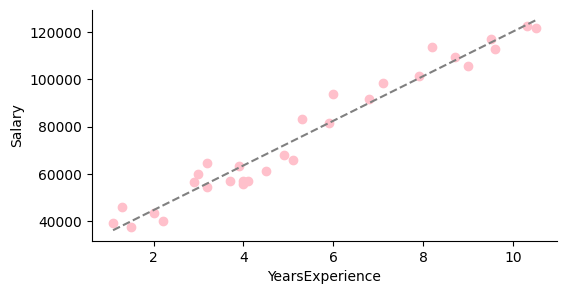

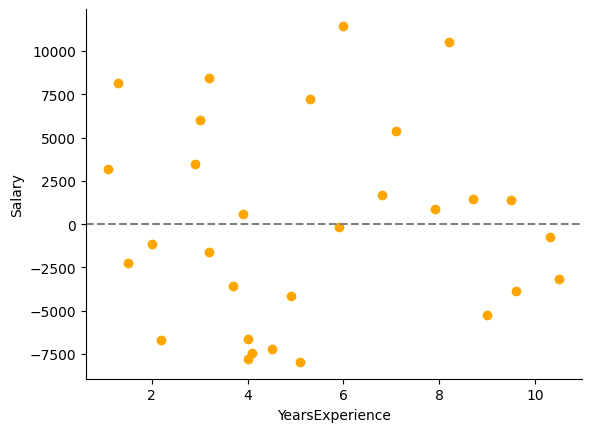

In [3]:
x=df["YearsExperience"]
y=df["Salary"]

#2 Realice un diagrama de dispersion para estos datos
import matplotlib.pyplot as plt

plt.figure(figsize = (6,3), dpi=100)
plt.scatter(x, y, label = "salary", color = "pink")
plt.xlabel("YearsExperience") #nombrar eje x
plt.ylabel("Salary") #nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)

#3 ¿Los datos soportan la suposicion de linealidad?
# Si

#4 Calcule el coeficiente de correlacion e interprete el resultado
from scipy.stats import pearsonr
r,_= pearsonr(x,y)
print(f"Coeficiente de correlacion: {r: 0.4f}/n")

#6 Obtenga la recta de regresion ajustada y grafiquelo sobre el grafico  de dispersion
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo= sm.OLS(y, x_constante).fit()

yc= modelo.predict(x_constante)

plt.plot(x, yc, color= "gray", linestyle= "--")

#5 Calcule el coeficiente de determinacion  e interprete el resultado
from sklearn.metrics import r2_score #recomendada
r2= r2_score(y,yc)
print(f"Coeficiente de determinacion: {r2: 0.4f}/n")

#7 Obtenga un intervalo de confiamza del 95% par la pendiente de la recta de regresion ajustada (b1)
nivel_de_confianza= 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1= intervalo_de_confianza.iloc[1]
print(f"Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}")
print(f"{intervalo_de_confianza_b1[0]: 0.4f}<b1< {intervalo_de_confianza_b1[1]:0.4f}/n")

#8 Calcule los residuales
residuales=modelo.resid
plt.figure()
plt.scatter(x, residuales, color= "orange")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.axhline(y= 0, color= "gray", linestyle= "--")
plt.gca().spines[["top", "right"]].set_visible(False)

#9 Realice la prueba de Shapiro para los residuales
from scipy.stats import shapiro
_, valor_p_sh= shapiro(residuales)
print(f"valor-p de Shapiro: {valor_p_sh: 0.4f}/n")
# Se acepta la hipotesis nula

#10 Realice la prueba de Breusch Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _= het_breuschpagan(residuales, x_constante)
print(f"valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}/n")
# Se acepta la hipotesis nula, hay homoscedasticidad

#11 Utiliza la recta de regresion para interpolar dos valores e interpolar uno
print(f"para x= 5, y={modelo.predict([1,5])}")
print(f"para x= 8, y={modelo.predict([1, 8])}")
print(f"para x= 20, y={modelo.predict([1, 20])}/n")

#12 Realice una tabla ANOVA e interprete el resultado
from statsmodels.formula.api import ols
#Y ~ X
modelo_lineal = ols("Salary~YearsExperience",data=df).fit()
tabla_anova= sm.stats.anova_lm(modelo_lineal)
tabla_anova
# Se acepta la hipotesis alterna

#CONCLUSION:
# -Soporta la suposicion de linealidad
# -Hay homoscedasticidad
# -Normalidad
# -Relacion fuertes entre las variables r=0.97
# -Modelo confiable para interpolacion y etrapolacion con moderacion